In [1]:
import pandas as pd
from math import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Loading the Data

In [2]:
Train=pd.read_csv('Data/TrainData1.csv')
Input=pd.read_csv('Data/WeatherForecastInput1.csv')
Train.head()

,TIMESTAMP,POWER,U10,V10,U100,V100
0,20150101 01:00,NaN,6.24,3.50,9.74,4.78
1,20150101 02:00,NaN,5.62,4.06,8.94,5.72
2,20150101 03:00,0.67,6.00,4.89,9.52,6.99
3,20150101 04:00,NaN,6.91,4.79,10.63,6.75
4,20150101 05:00,NaN,6.95,4.83,10.70,6.74


In [3]:
Train=Train.dropna()
Train= Train.reset_index(drop=True)
Train.head()

,TIMESTAMP,POWER,U10,V10,U100,V100
0,20150101 03:00,0.67,6.00,4.89,9.52,6.99
1,20150101 06:00,0.94,6.18,5.70,9.73,8.10
2,20150101 09:00,0.94,7.39,5.66,11.22,8.11
3,20150101 12:00,0.91,7.84,5.52,12.57,8.26
4,20150101 15:00,0.97,7.38,7.40,11.32,10.65


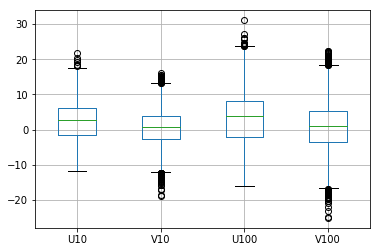

In [4]:
Train.boxplot(column=['U10','V10','U100','V100'])
plt.show()

### Get Velocity Intensties

In [5]:
Train['WS10']=[sqrt(Train['U10'][i]**2+Train['V10'][i]**2) for i in range(len(Train['U10']))]
Train['WS100']=[sqrt(Train['U100'][i]**2+Train['V100'][i]**2) for i in range(len(Train['U100']))]

In [6]:
Train.head()

,TIMESTAMP,POWER,U10,V10,U100,V100,WS10,WS100
0,20150101 03:00,0.67,6.00,4.89,9.52,6.99,7.740291,11.810610
1,20150101 06:00,0.94,6.18,5.70,9.73,8.10,8.407283,12.660288
2,20150101 09:00,0.94,7.39,5.66,11.22,8.11,9.308475,13.844150
3,20150101 12:00,0.91,7.84,5.52,12.57,8.26,9.588326,15.041027
4,20150101 15:00,0.97,7.38,7.40,11.32,10.65,10.451048,15.542358


In [7]:
#Use linear interpolation to get velocity at 70 m
Train['WS']=[np.interp(70, [10,100], [Train['WS10'][i],Train['WS100'][i]]) for i in range(len(Train['WS10']))]
Train['WS1']=[pow((70/100),(0.14))*Train['WS100'][i] for i in range(len(Train['WS100']))]
Train.head()


,TIMESTAMP,POWER,U10,V10,U100,V100,WS10,WS100,WS,WS1
0,20150101 03:00,0.67,6.00,4.89,9.52,6.99,7.740291,11.810610,10.453837,11.235335
1,20150101 06:00,0.94,6.18,5.70,9.73,8.10,8.407283,12.660288,11.242620,12.043628
2,20150101 09:00,0.94,7.39,5.66,11.22,8.11,9.308475,13.844150,12.332258,13.169826
3,20150101 12:00,0.91,7.84,5.52,12.57,8.26,9.588326,15.041027,13.223460,14.308405
4,20150101 15:00,0.97,7.38,7.40,11.32,10.65,10.451048,15.542358,13.845255,14.785317


In [8]:
Train.head()

,TIMESTAMP,POWER,U10,V10,U100,V100,WS10,WS100,WS,WS1
0,20150101 03:00,0.67,6.00,4.89,9.52,6.99,7.740291,11.810610,10.453837,11.235335
1,20150101 06:00,0.94,6.18,5.70,9.73,8.10,8.407283,12.660288,11.242620,12.043628
2,20150101 09:00,0.94,7.39,5.66,11.22,8.11,9.308475,13.844150,12.332258,13.169826
3,20150101 12:00,0.91,7.84,5.52,12.57,8.26,9.588326,15.041027,13.223460,14.308405
4,20150101 15:00,0.97,7.38,7.40,11.32,10.65,10.451048,15.542358,13.845255,14.785317


In [9]:
X=Train['WS']
X=np.array(X).reshape(-1,1)
y=Train['POWER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
reg = LinearRegression().fit(X_train, y_train)
y_est=reg.predict(X_test)



/Users/mac/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/Users/mac/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/Users/mac/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


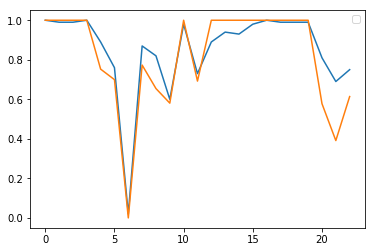

Error vector:  [0.15210069561032627, 0.15735956580768878, 0.15802135384879232, 0.15450471953313596, 0.14966911059760066, 0.14804692839174075, 0.15396904671478953, 0.1537269660397678, 0.15189209284375055, 0.153051539710807]
Mean Error 0.15323420190984


In [10]:
# Train Linear regression using K-Fold cross validation
K = 10
CV = model_selection.KFold(K, shuffle=True)
X=Train['WS']

y=Train['POWER']
k=0
Error_test=[0]*K

for train_index, test_index in CV.split(X,y):
    
    # extract training and test set for current CV fold
    X_train = X.iloc[train_index].reset_index(drop=True)
    y_train = y.iloc[train_index].reset_index(drop=True)
    X_test = X.iloc[test_index].reset_index(drop=True)
    y_test = y.iloc[test_index].reset_index(drop=True)
    train_index1=np.array(X_train[(X_train<12) & (X_train>4)].index)
    test_index1=np.array(X_test[(X_test<12) & (X_test>4)].index)
    test_index12=np.array(X_test[X_test>12].index)
    #Estimate the input
    
    reg = LinearRegression().fit(np.array(X_train.iloc[train_index1]).reshape(-1,1), y_train.iloc[train_index1])
    y_est=np.zeros(len(y_test))
    y_est[test_index1]=reg.predict(np.array(X_test.iloc[test_index1]).reshape(-1,1))
    y_est[test_index12]=np.ones(len(test_index12))

    # Compute mean squared error 
  
    Error_test[k] = sqrt(np.square(y_test-y_est).sum(axis=0)/y_test.shape[0])
    k+=1

plt.plot(range(len(y_test[0:23])),y_test[0:23])
plt.plot(range(len(y_test[0:23])),y_est[0:23])
plt.legend('True','Est')
plt.show()
#Error_test
#y_est.shape[0]
print("Error vector: ",Error_test)
print("Mean Error",np.mean(Error_test) )
#plt.figure
#plt.scatter(X_test,y_test, s=80, facecolors='none', edgecolors='b')
#plt.scatter(X_test,y_est, s=80, facecolors='none', edgecolors='r')
#plt.legend('True','Est')
#plt.show()


/Users/mac/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/Users/mac/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/Users/mac/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


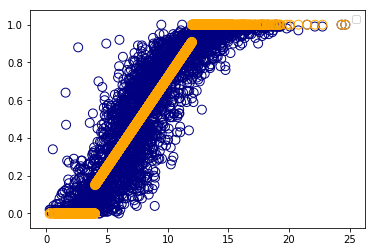

In [11]:
plt.figure
plt.scatter(X_test,y_test, s=80, facecolors='none', edgecolors='navy')
plt.scatter(X_test,y_est, s=80, facecolors='none', edgecolors='orange')
plt.legend('True','Est')
plt.show()



In [12]:
X_inp=Input[['U10','V10','U100','V100']]
Input['WS10']=[sqrt(Input['U10'][i]**2+Input['V10'][i]**2) for i in range(len(Input['U10']))]
Input['WS100']=[sqrt(Input['U100'][i]**2+Input['V100'][i]**2) for i in range(len(Input['U100']))]
#Input['Mean_WS']=Input['WS10']+Input['WS100']/2

Input.head()

,TIMESTAMP,U10,V10,U100,V100,WS10,WS100
0,20180101 01:00,3.84219,6.22313,6.16049,8.55337,7.313670,10.540957
1,20180101 02:00,3.89048,7.04302,6.15886,9.52636,8.046115,11.343857
2,20180101 03:00,7.40522,6.96923,10.51820,9.21413,10.168945,13.983302
3,20180101 04:00,5.80698,7.30140,8.36173,9.81111,9.329065,12.890943
4,20180101 05:00,5.47721,7.32334,7.94547,9.75995,9.145006,12.585194


In [ ]:
Input['WS']=[np.interp(70, [10,100], [Input['WS10'][i],Input['WS100'][i]]) for i in range(len(Input['WS10']))]
X_inp=Input[['U10','U100','V10','V100','WS']].loc[(Input['WS']< 12) & (Input['WS']> 4)]
Input.loc[(Input['WS']< 12) & (Input['WS']> 4), 'FORECAST'] = reg.predict(X_inp)
Input.loc[Input['WS']< 4, 'FORECAST'] = 0
Input.loc[Input['WS']> 12, 'FORECAST'] = 1

### Compare Actual to Predicted

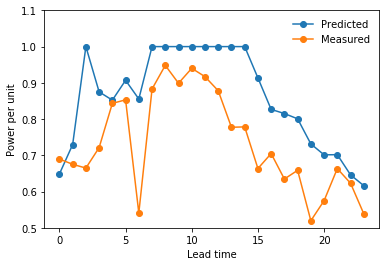

In [13]:

Sol1=pd.read_csv('Solution1.csv')
Forecast=pd.read_csv('31761-Nuclearwouldbeeasier-stage1.csv')
#plt.style.use('classic')
fig, ax = plt.subplots()
ax.plot(range(len(Forecast['FORECAST'])),Forecast['FORECAST'],'o-',label='Predicted')
ax.plot(range(len(Sol1['POWER'])),Sol1['POWER'],'o-',label='Measured')
leg = ax.legend()
ax.legend(loc='upper right', frameon=False)
#plt.legend('PREDICTED','MEASURED')
plt.xlabel('Lead time')
plt.ylabel('Power per unit')
plt.ylim([0.5,1.1])
#plt.legend('PREDICTED','MEASURED')
plt.savefig('FORE-MEAS.eps',format='eps',dpi=1000)
plt.show()

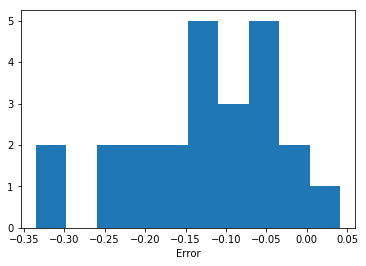

In [14]:
Sol=pd.read_csv('Solution1.csv')
Errors=Sol1['POWER']-Forecast['FORECAST']
plt.hist(Errors)
plt.xlabel('Error')
plt.show()